### Analyzing the Stroop Effect

We have a sample of people who have taken both tests in the stroop experiment: One with congruent words whose color matches the color in the word, and one with incongruent words whose color does not match.

(1) Independent variable and dependent variable:

> **independent variables**: congruent and incongruent words

> **dependent variable**: duration of test

(2) Hypotheses statement and kind of statistical test we expect to perform:

### Hypothesis 
$Ho$ (null): $\mu$1 = $\mu$2

> In other words, the null hypothesis is that the mean duration of all tests in the population for congruent words is **equal** to the mean duration of all tests in the population for congruent words.

$Ha$ (alternative): $\mu$1 ≠ $\mu$2

> In other words, the alternative hypothesis is that the mean duration of all tests in the population for congruent words is **not equal** to the mean duration of all tests in the population for congruent words.

### Statistical Test

We are going to perform a dependent paired t-test with a two-tailed p-value. It has to be a t-test because our sample size is under 30 (24). We can also assume the distribution is nearly normal because our degrees of freedom is above 30 (24 + 24 - 2 = 46). It is not totally independent because it is a paired test in which the same population is performing two different tests. It is a two-tailed test because in our alternative hypothesis we say that the two population means are unequal, not one being greater than or less than the other.

(3) Descriptive statistics regarding this dataset, including at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('stroopdata.csv')
print('Congruent Variance: {}'.format(np.var(df['Congruent'])))
print('Incongruent Variance: {}'.format(np.var(df['Incongruent'])))
df.describe()

Congruent Variance: 12.141152859375003
Incongruent Variance: 22.05293382638889


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


--write answer here--

(4) Some visualizations showing the distribution of the sample data, noting our observations about the plot or plots.

Text(0.5,0,'Duration')

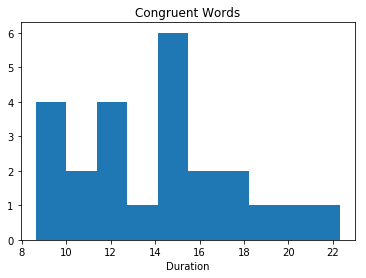

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.hist(df['Congruent'])
plt.title('Congruent Words')
plt.xlabel('Duration')

Text(0.5,0,'Duration')

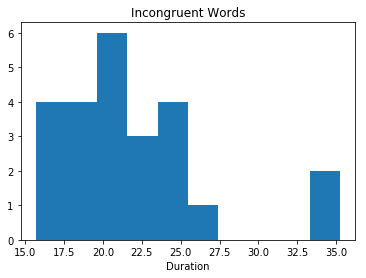

In [4]:
plt.hist(df['Incongruent'])
plt.title('Incongruent Words')
plt.xlabel('Duration')

**Duration Distributions**: Neither Congruent Word or Incongruent word durations seem to be normally distributed, however, it is difficult to verify normality in small datasets (these are a size of 24). It does appear that Congruent word durations peak at 15 minutes and Incongruent word durations peak at 20 minutes.

(5) Now, we'll perform the statistical test and report the results. What is the confidence level and critical statistic value? Do we reject the null hypothesis or fail to reject it? We'll come to a conclusion in terms of the experiment task. Did the results match up with our expectations?

In [5]:
import statsmodels.api as sm
import scipy.stats as stats
from math import sqrt
from scipy.stats import t

#run independent t-test
t_test = stats.ttest_rel(df['Congruent'], df['Incongruent'], axis=0)

/Users/christinacaddel/anaconda3/envs/sampling_distrib/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
#convert independent variable columns to lists in order to calculate summary stats individually
con = df['Congruent'].tolist()
incon = df['Incongruent'].tolist()

In [7]:
##Calculate the mean difference and 95% confidence interval

#calculate size of dataset for each independent variable
n_con = 24
n_incon = 24

#calculate degrees of freedom
df = (n_con + n_incon - 2)

#calculate standard deviation of each independent variable, and average standard deviation between the two groups
std_con = np.std(con)
std_incon = np.std(incon)
std_both = sqrt(((n_con-1)*(std_con)**2 + (n_incon-1)*(std_incon)**2)/df)

#calculate the mean difference and margin of error
diff_mean = np.mean(con) - np.mean(incon)
MoE = t.ppf(0.95, df) * std_both * sqrt(1/n_con + 1/n_incon)

In [8]:
print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(t_test[0],round(t_test[1],5)))
print('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = -8.021
	p-value = 0.000

The difference between groups is -8.0 [-10.0 to -6.0] (mean [95% CI])


**Results**:
> Here we performed an independent t-test, given the small sample sizes. Our confidence level is 95% and our p-value is 0.000. This indicates that there is statistical significance to our results and we can reject the null hypothesis in favor of the alternative that the duration of tests for congruent words in not equal to that of congruent words.

> When I performed the experiment tast myself, interestingly enough my particular results reflected no real difference in test durations between congruent and incongruent words. So in other words, the results here did not match up with my expectations. My suspicion, however, is that because I was given a preface in the context of this test, I may have been prepared psychologically for the incongruent words to appear the way they did and therefore may have been subconsciously prepared to pick up my speed there.

**Further Reasoning**:
> The effects observed in this statistical test can be caused by two mainly considered theories. One is the mental prioritization that takes place when we read, compared to defining colors. Another is the automaticity of reading. Regardless of the theory though, there is a central understanding that reading is a simpler and more automatic task than stating colors - therefore, a conflict between the two will increase the time needed for processing when they are not aligned.

> Another example of the phenomen taking place in this test is a very common excercise, often in social settings with friends or children. It's when you try rubbing your stomach in circular motion and tapping your head in a perpendicular motion at the same time. The two motions taking place simulataneously by either arm are rather similar to the additional processing time necessary in the incongruent words phenomenon.

**References**:

> https://imotions.com/blog/the-stroop-effect/

> https://faculty.washington.edu/chudler/words.html